In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
def request(url):
    page = requests.get(url)
    return BeautifulSoup(page.text, 'html.parser')

In [3]:
kun_uz = 'https://kun.uz/uz'
page = requests.get(kun_uz)
soup = BeautifulSoup(page.text, 'html.parser')
urls = soup.find_all('div', class_='mb-25')

In [4]:
urls[0].find_all('a')[0]

<a class="news-lenta" href="/uz/news/2022/12/03/2023-yilda-sayohat-uchun-eng-xavfli-mamlakatlar-nomi-elon-qilindi">
<div class="news-meta"><span>02:17</span></div>
<span class="news-lenta__title"> 2023 yilda sayohat uchun eng xavfli mamlakatlar nomi e’lon qilindi</span>
</a>

In [5]:
ulrs_list = []
title_list = []
for x in urls[0].find_all('a'):
    ulrs_list.append(f"https://kun.uz{x.get('href')}")
    title_list.append(x.find('span', class_='news-lenta__title').get_text())

In [6]:
ur1 = 'https://kun.uz/uz/news/2022/12/02/ozbekiston-nomoddiy-madaniy-merosining-yana-ikki-elementi-yunesko-royxatiga-kiritildi'
soup = request(url=ur1)

In [7]:
title = soup.find('div', class_='single-header__title').get_text()

In [8]:
contents = soup.find('div', class_='single-content')

In [9]:
content = contents.find('h4').get_text()

In [10]:
contents_p = contents.find_all('p')

In [11]:
for x in contents_p:
    content += " " + x.get_text()

In [12]:
content

'Reprezentativ ro‘yxatga kiritilgan O‘zbekiston elementlarining umumiy soni 11 taga yetdi. Ilgari bu ro‘yxatga «Baxshi», «Lazgi», «Palov», «Askiya», «Miniatyura», «Navro‘z», «Shoshmaqom» va boshqalar kiritilgan edi. Marokash poytaxti Rabot shahrida bo‘lib o‘tayotgan Nomoddiy madaniy merosni muhofaza qilish bo‘yicha Hukumatlararo qo‘mitaning 17-sessiyasi O‘zbekiston uchun muhim madaniy voqea bo‘ldi. O‘zbekiston tomoni ishtirokida ikkita ko‘pmillatli element Insoniyatning nomoddiy madaniy merosi Reprezentativ ro‘yxatiga kiritildi. O‘zbekiston tomonidan Ozarboyjon, Afg‘oniston, Eron, Tojikiston, Turkmaniston va Turkiya bilan birgalikda «Ipakchilik va to‘quv uchun an’anaviy ipak ishlab chiqarish» nomli birinchi fayl taqdim etildi. Ikkinchi nominatsiya «Xo‘ja Nasriddin haqidagi latifalarni takrorlash an’analari» deb nomlangan bo‘lib, O‘zbekiston tomoni Ozarboyjon, Qozog‘iston, Qirg‘iziston, Tojikiston, Turkmaniston va Turkiya bilan hamkorlikda tayyorlagan.  Qo‘mitaning baholash komissiyasi 

In [13]:
new_date = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

In [14]:
new_date

'2022-12-03 03:08:29'

WE WILL DETERMINE THE QUALITY OF THE FOUND WORDS

In [15]:
df = pd.read_csv('Data.csv')
df

,id,url,date,title,content
0,1,https://kun.uz/uz/news/2022/12/02/iib-va-mahal...,2022-12-02 18:04:09,IIB va mahalliy idoralar klasterlar xizmatida....,Xorazm viloyatining Xonqa tumanida “Xonqa Gold...
1,2,https://kun.uz/uz/news/2022/12/02/saakashvili-...,2022-12-02 19:02:27,Saakashvili siyosatni tark etmoqchi,Gruziya sobiq prezidenti Mixail Saakashvili si...
2,3,https://kun.uz/uz/news/2022/12/02/samarqandda-...,2022-12-02 19:20:50,Samarqandda Rossiya-O‘zbekiston biznes-forumi ...,"Forum yakuniga ko‘ra, o‘zaro hamkorlikni rivoj..."
3,4,https://kun.uz/uz/news/2022/12/02/portugallar-...,2022-12-02 19:30:59,Portugallar Braziliyaga tushib qolishi mumkin....,Bugun mundialda nimalar hal bo‘ladi? 2 dekabr ...
4,5,https://kun.uz/uz/news/2022/12/02/pentagon-yan...,2022-12-02 19:51:19,Pentagon yangi B-21 Raider «ko‘rinmas» strateg...,Ushbu samolyot kelajakda AQSh yadroviy triadas...
5,6,https://kun.uz/uz/news/2022/12/02/iiv-buxoroda...,2022-12-02 20:31:52,IIV Buxoroda IIB binosida fuqaro vafot etganin...,"Internetda tarqalgan xabarga ko‘ra, iqtisodiy ..."
6,7,https://kun.uz/uz/news/2022/12/02/si-jinping-b...,2022-12-02 23:59:01,Si Jinping birinchi marta Xitoydagi norozilikl...,Xitoy rahbari noroziliklar ortida «alamzada ta...
7,12,https://kun.uz/uz/news/2022/12/03/ilon-mask-te...,2022-12-03 00:37:52,Ilon Mask Tesla Semi yuk mashinasini taqdim et...,U bir zaryadda 15 tonna yukni 800 kilometr mas...
8,13,https://kun.uz/uz/news/2022/12/03/turkiyalik-s...,2022-12-03 00:58:25,Turkiyalik sharhlovchi JCh-2022 o‘yini tanaffu...,Sharhlovchi muxolifatga aloqador bo‘lgan sobiq...
9,14,https://kun.uz/uz/news/2022/12/03/2023-yilda-s...,2022-12-03 02:21:17,2023 yilda sayohat uchun eng xavfli mamlakatla...,"Kelasi yili Afg‘oniston, Suriya va Ukrainaga s..."


In [16]:
word = df.content[0].split()
word

['Xorazm',
 'viloyatining',
 'Xonqa',
 'tumanida',
 '“Xonqa',
 'Gold',
 'Fiber”',
 'qishloq',
 'xo‘jaligi',
 'kooperativi',
 'o‘z',
 'mablag‘iga',
 'yetishtirgan',
 'paxtani',
 'qayta',
 'ishlovchi',
 'korxonaga',
 'yetkazayotganida',
 'ichki',
 'ishlar,',
 'agroinspeksiya',
 'va',
 'yana',
 'bir',
 'qancha',
 'idoralar',
 'yo‘lto‘sarlik',
 'qilib,',
 'paxtani',
 'tortib',
 'olishgan.',
 'Kun.uz',
 'kooperativ',
 'rahbaridan',
 'nima',
 'bo‘lgani',
 'haqida',
 'gapirib',
 'berishni,',
 'huquqshunosdan',
 'esa',
 'huquqiy',
 'izoh',
 'berishni',
 'so‘radi.',
 '“Bir',
 'monopolist',
 'klasterni',
 'deb,',
 'bizga',
 'yo‘l',
 'berishmayapti”',
 'Xo‘janiyozov',
 'Shokir,',
 '“Xonqa',
 'Gold',
 'Fiber”',
 'q/x',
 'kooperativi',
 'a’zosi:',
 '—',
 'Xonqa',
 'tumanida',
 '3',
 'nafar',
 'fermer',
 'birlashib,',
 '“Fermer',
 'xo‘jaliklari',
 'to‘g‘risida”gi',
 'qonun',
 'moddalariga,',
 'prezidentimizning',
 '2020',
 'yil',
 '6',
 'martdagi',
 '4633-sonli',
 'qaroriga',
 'asosan',
 'ixtiyoriy'

In [17]:
error = 0
for x in set(word):
    if len(x) > 2:  # here we remove the words "va", "bu" and various symbols
        if x.isalpha: # only receive letters
            pass
        else:
            error += 1
    else:
        error += 1

In [18]:
len(word), len(set(word)), error, f"real=>{len(set(word)) - error}"

(760, 550, 11, 'real=>539')

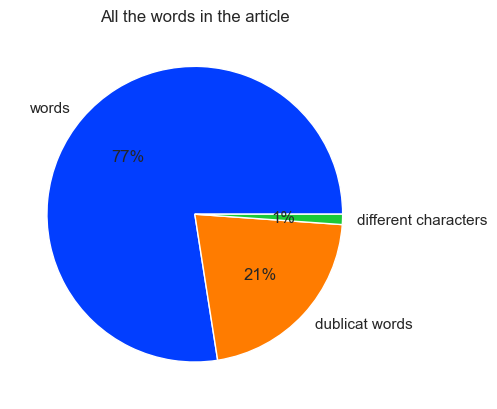

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

len_word = len(word)
dublicate = len_word - len(set(word))

data = [len_word, dublicate, error ]
labels = ['words', 'dublicat words', 'different characters']

colors = sns.color_palette('bright')[0:3]
sns.set_theme(style="ticks")

plt.title("All the words in the article")
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()